# LEAD SCORING CASE STUDY

## Problem Statement:

 The company X Education sells online courses to industry professionals, want us to build a model which requires to identify the hot leads & need us to nuture the leads inorder to get high lead conversion rate & also to identify cold leads where the company wants to save time & resources.

### IDENTIFY THE PROMISING LEADS !!!

## <font color='Green'> 1.Data understanding & preparation

In [1040]:
## import warnings 
import warnings 
warnings.filterwarnings('ignore')

In [1041]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split


In [1042]:
### TO DISPLAY  MORE NO OF COLUMNS & ROWS
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)



In [1043]:
## loading the dataset
data= pd.read_csv(r"C:\Users\lenovo pc\Desktop\Data science\Lead assignment\Lead Scoring Assignment\Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1044]:
data.shape

(9240, 37)

In [1045]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### looks like there are nulls in some columns


In [1046]:
### lets check the unique values
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [1047]:
## dropping the unique value columns
data.drop(columns=['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
                 'Receive More Updates About Our Courses','Magazine'],axis =1,inplace = True)


In [1048]:
### here columns with 'select' are as good as nulls so lets replace it 
data = data.replace('Select',np.nan)

In [1049]:
### lets check the nulls values
(data.isnull().mean()*100).sort_values(ascending= False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### lets remove the nulls more than 35% 


In [1050]:
null_col = data.columns[(data.isnull().mean()*100)>= 35]
null_col

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [1051]:
## drop the data_null from the dataset
data.drop(columns= data_null, inplace= True)

In [1052]:
data.shape


(9240, 22)

In [1053]:
(data.isnull().mean()*100).sort_values(ascending= False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Prospect ID                                       0.000000
Lead Number                                       0.000000
Total Time Spent on Website                       0.0000

In [1054]:
## filling na with Not Available
data['What matters most to you in choosing a course'].fillna(value='Not Available',inplace = True)
data['What is your current occupation'].fillna(value='Not Available',inplace = True)
data['Country'].fillna(value='Not Available',inplace = True)


In [1055]:
data['Country'].value_counts()

India                   6492
Not Available           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [1056]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Available":
        category = "Not Available"
    else:
        category = "Outside India"
    return category

data['Country'] = data.apply(lambda x:slots(x['Country']), axis = 1)
data['Country'].value_counts()

India            6492
Not Available    2461
Outside India     287
Name: Country, dtype: int64

In [1057]:
# checking Lead source
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1058]:
### replace the word google with Google
data['Lead Source']= data['Lead Source'].replace('google','Google')

In [1059]:
(data.isnull().mean()*100).sort_values(ascending=False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
What matters most to you in choosing a course    0.000000
A free copy of Mastering The Interview           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Search                                           0.000000
Country                                          0.000000
What is your current occupation                  0.000000
Lead Number                                      0.000000
Total Time Spent on Website                      0.000000
Converted     

In [1060]:
## Hence the % of nulls are less lets remove them
data = data[~data['TotalVisits'].isnull()]
data = data[~data['Page Views Per Visit'].isnull()]
data = data[~data['Last Activity'].isnull()]
data = data[~data['Lead Source'].isnull()]


In [1061]:
(data.isnull().mean()*100).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                      0.0
Converted                                        0.0
Do Not Call                                      0.0
Do Not Email                                  

In [1062]:
data.shape

(9074, 22)

In [1063]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [1064]:
## lets remove the unique value columns Prospect ID & lead Number
data.drop(columns=['Prospect ID','Lead Number'], axis=1, inplace=True)

In [1065]:
data.shape

(9074, 20)

#  <font color='Green'>Analysis of Dataset

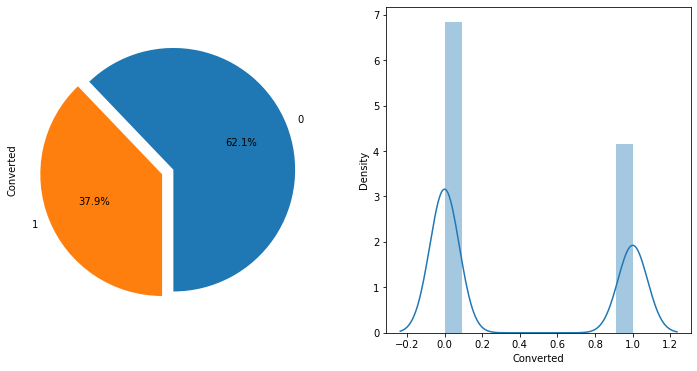

In [1066]:
#Checking Data Imbalance
#Plotting a piechart to check the count value of Leads
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
data.Converted.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',startangle=270)
plt.subplot(1,2,2)
sns.distplot(data.Converted,kde=True)
plt.show()

### From the plot we can observe that 37.9% are converted & rest are not converted

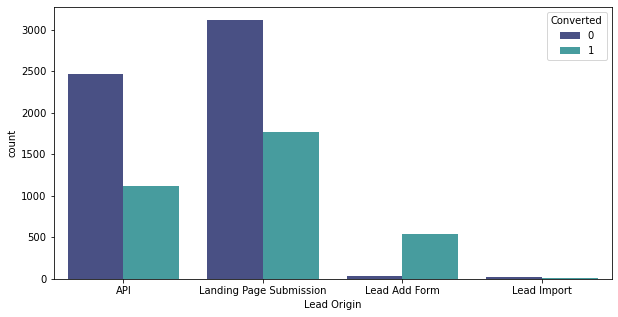

In [1067]:
#checking countplot for lead origin
plt.figure(figsize=[10,5])
sns.countplot(data['Lead Origin'],hue=data.Converted,palette='mako')
plt.show()

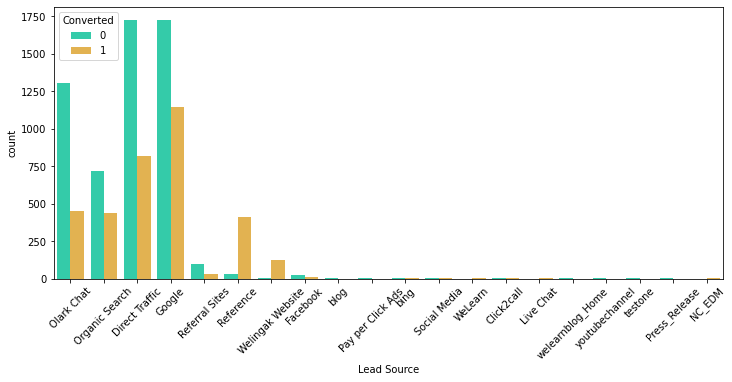

In [1068]:
#checking countplot for lead source
plt.figure(figsize=[12,5])
sns.countplot(data['Lead Source'],hue=data.Converted,palette='turbo')
plt.xticks(rotation=45)
plt.show()

#### From the plot we can analyse that Direct traffic & google shows more count of lead sources
#### Lead conversion rate is high for Reference & Wellingak Website 

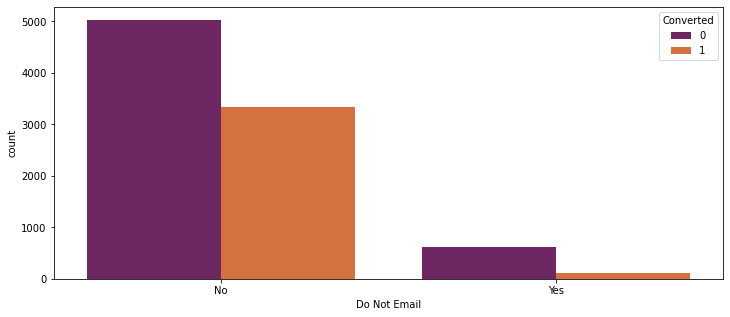

In [1069]:
### Lets Check the Do not mail column
plt.figure(figsize=[12,5])
sns.countplot(data['Do Not Email'],hue=data.Converted, palette='inferno')
plt.show()

#### From the plot we can say that majority of the leads preffered mail them & shows more conversion rate 

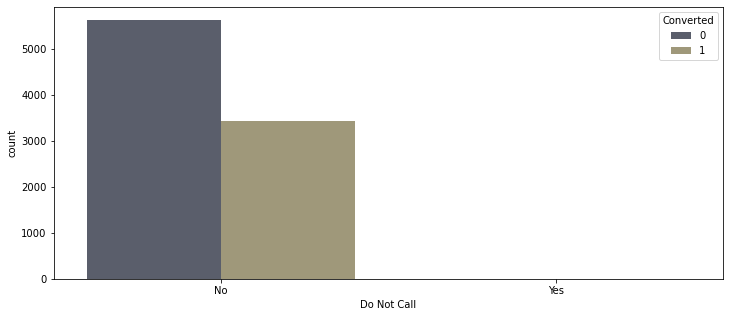

In [1070]:
### ### Lets Check the Do not call column
plt.figure(figsize=[12,5])
sns.countplot(data['Do Not Call'],hue=data.Converted,palette='cividis')
plt.show()

#### from the plot we can see the leads generated through calls & shows some decent conversion rate

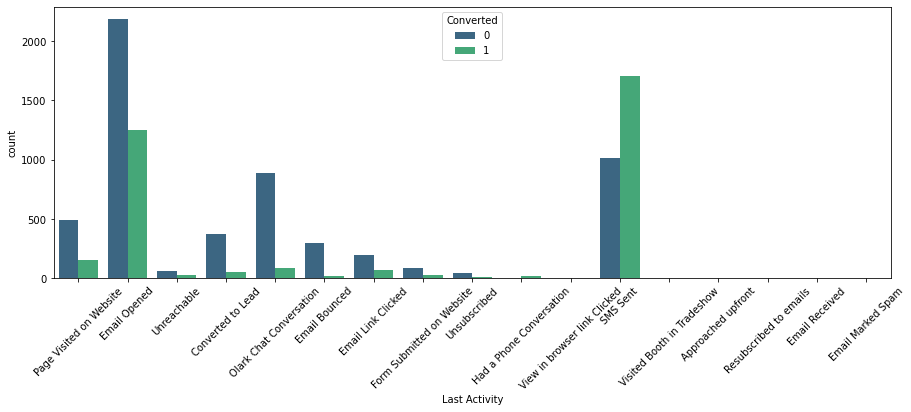

In [1071]:
### lets check the Last activity column 
plt.figure(figsize=[15,5])
sns.countplot(data['Last Activity'],hue= data.Converted, palette='viridis')
plt.xticks(rotation=45)
plt.show()

#### More than 2000 leads are who opened email
#### For leads to whom sms sent show very high conversion rate of arround ~1600

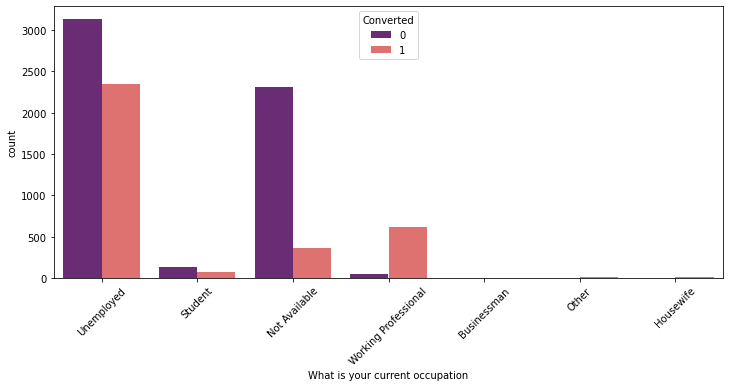

In [1072]:
## lets look What is your current occupation column
plt.figure(figsize=[12,5])
sns.countplot(data['What is your current occupation'],hue=data.Converted,palette='magma')
plt.xticks(rotation=45)
plt.show()

#### From the plot we can see Unemployed category more no of leads & shows good conversion rate
#### But majority of the conversion rate shown by Working professionals

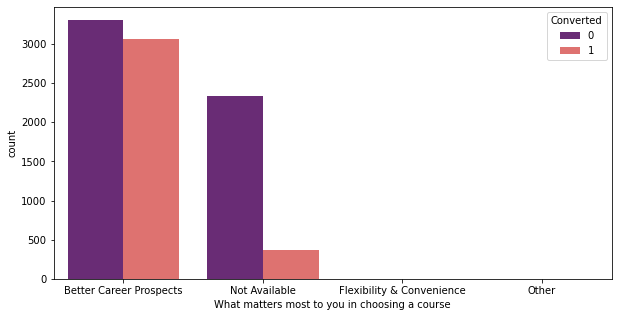

In [1073]:
### lets look What matters most to you in choosing a course column
plt.figure(figsize=[10,5])
sns.countplot(data['What matters most to you in choosing a course'],hue= data.Converted,palette= 'magma')
plt.show()

#### From the plot we can see Better career prospects shows more leads & good conversion rate

In [1074]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


# <font color='Green'> Numerical variables

In [1075]:
## lets look some numerical variables


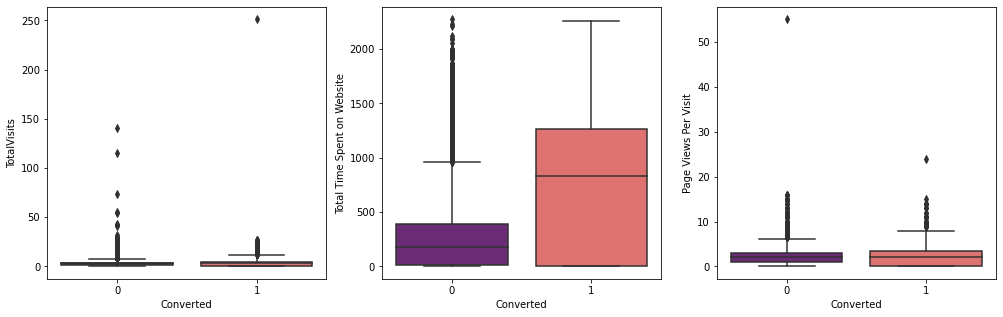

In [1076]:
num_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
col_num=1
plt.figure(figsize=[17,5])
for i in num_col:
    plt.subplot(1,3,col_num)
    sns.boxplot(y=i,x="Converted",data=data,palette='magma')
    col_num+=1
    
plt.show() 

#### For a range of ~1000 average hours spent on website showing good conversion rate 

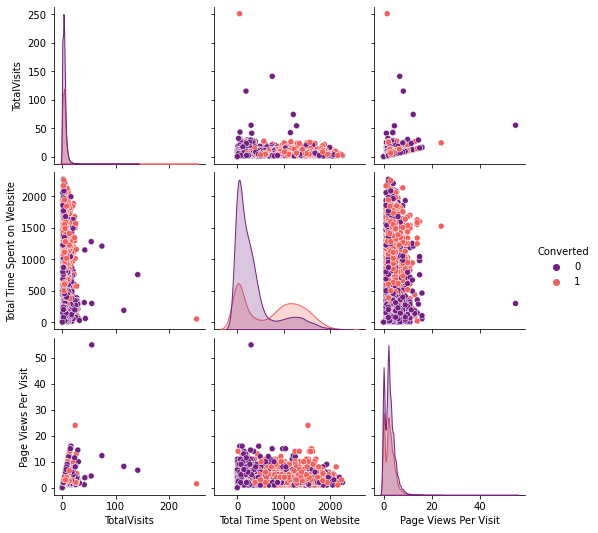

In [1077]:
### lets see some pairplots on numerical variables 
sns.pairplot(data,diag_kind='kde',hue='Converted',palette='magma')
plt.show()

#### From the plot we can see Total time spent of > 1000 hours shows more conversion rate with average page visits being 10


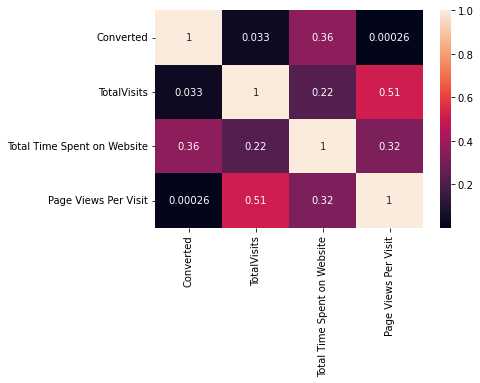

In [1078]:
#Plotting a heatmap for numerical variables
sns.heatmap(data.corr(),annot=True)
plt.show()


#### From the heat map above we can say Total visits shows high correlation with pages per visit

# <font color = 'Green'> Data Preparation

#### Lets create Dummy Variables


In [1079]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [1080]:
data.loc[:, data.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1081]:
# Creating dummy variables 
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']])

# adding it to the final dataframe
df = pd.concat([data,dummy1],axis = 1)
df.head()

# dropping the columns from final df
df.drop(columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis = 1,inplace = True )

In [1082]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [1083]:
data.shape

(9074, 20)

In [1084]:
df.shape

(9074, 93)

In [1085]:
dummy1.shape

(9074, 89)

In [1086]:
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Click2call',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Do Not Email_No', 'Do Not Email_Yes',
       'Do Not Call_No', 'Do Not Call_Yes', 'Last Activity_Approached upfront',
       'Last Activity_Converted to Lead', 'Last Activity_Email 

# <font color = 'Green'> 4.Train & Test Split

In [1087]:
from sklearn.model_selection import train_test_split

In [1088]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1089]:
## Putting feature variables to X
X = df.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1090]:
## Assign feature varible to Y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1091]:
### lets split train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# <font color ='Violet' >Feature Scaling

In [1092]:
from sklearn.preprocessing import StandardScaler

In [1093]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.284595,-0.160255,-0.179666,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.132538,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.179666,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.295588,2.017593,0.058552,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1094]:
### Checking Conversion rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.85541106458012

#### Conversion rate is ~38%

# <font color = 'Violet'> Correlation Matrix


In [1095]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

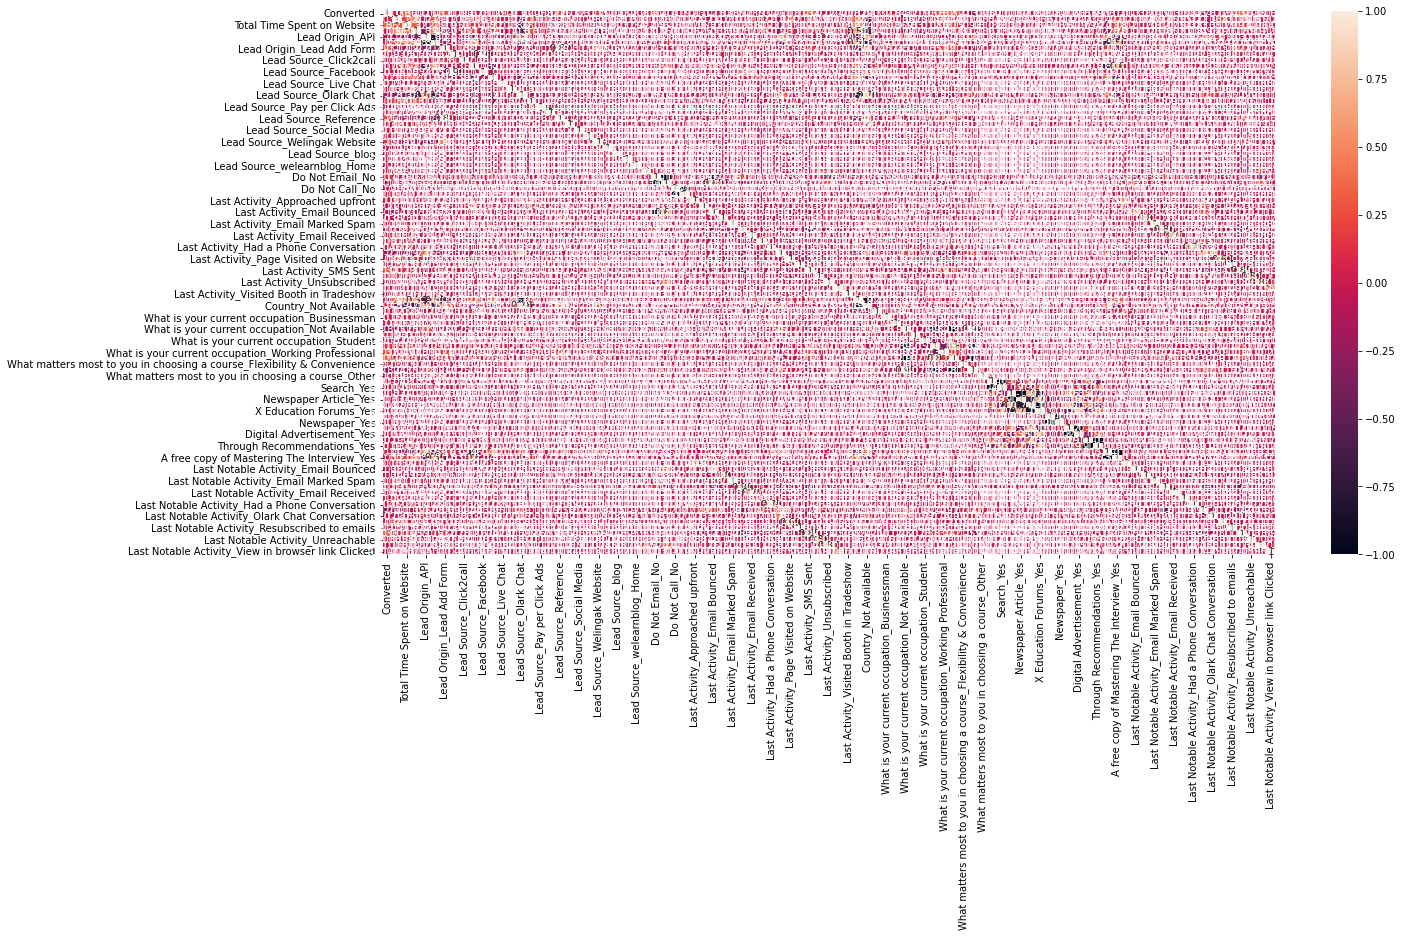

In [1096]:
## lets plot Correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

#### Hence there are lot of variables it is difficult to check the correlation


# <font color = 'Green'>5.Model Building 

In [1097]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1098]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1099]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select =  15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1100]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False])

In [1101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 45),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 53),
 ('Lead Origin_API', False, 3),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 73),
 ('Lead Source_Click2call', False, 39),
 ('Lead Source_Direct Traffic', False, 33),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 54),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 67),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 21),
 ('Lead Source_WeLearn', False, 77),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 69),
 ('Lead Source_blog', False, 48),
 ('Lead Source_testone', False, 43),
 ('Lead S

In [1102]:
col = X_train.columns[rfe.support_]

In [1103]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Click2call', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Do Not Call_No', 'Do Not Call_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited 

In [1104]:
## fitting the model
## Model 1
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.6
Date:                Tue, 23 May 2023   Deviance:                       5139.2
Time:                        02:50:20   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -4.0160      0.191    -21.070      0.000      -4.390      -3.642
Total Time Spent on Website                                               1.1341      0.041     27.745      0.000       1.054       1.214
Lead Origin_Lead Add Form                                                 3.5732      0.221     16.171      0.000       3.140       4.006
Lead Source_Olark Chat                                                    1.4200      0.107     13.279      0.000       1.210       1.630
Lead Source_Welingak Website                                              1.9981      0.751      2.659      0.008       0.525       3.471
Do Not Email_No                                                           1.6376      0.172      9.545      0.000       1.301       1.974
Last Activity_Approached upfront                                         22.4495      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Last Activity_Converted to Lead                                          -1.2852      0.225     -5.711      0.000      -1.726      -0.844
Last Activity_Had a Phone Conversation                                    1.2902      1.157      1.115      0.265      -0.978       3.559
Last Activity_Olark Chat Conversation                                    -1.3420      0.164     -8.180      0.000      -1.664      -1.020
Last Activity_SMS Sent                                                    1.2393      0.075     16.417      0.000       1.091       1.387
What is your current occupation_Housewife                                22.6825   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
What is your current occupation_Working Professional                      2.5188      0.189     13.317      0.000       2.148       2.890
What matters most to you in choosing a course_Better Career Prospects     1.3056      0.088     14.804      0.000       1.133       1.478
Last Notable Activity_Had a Phone Conversation                            2.2870      1.608      1.422      0.155      -0.864       5.438
Last Notable Activity_Unreachable                                         2.0225      0.495      4.084      0.000       1.052       2.993
=========================================================================================================================================
"""

### VIF values of the feature variables



In [1105]:
## check the VIF values for the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_No,4.08
7,Last Activity_Had a Phone Conversation,3.41
13,Last Notable Activity_Had a Phone Conversation,3.40
12,What matters most to you in choosing a course_...,3.35
2,Lead Source_Olark Chat,1.76
1,Lead Origin_Lead Add Form,1.63
9,Last Activity_SMS Sent,1.61
8,Last Activity_Olark Chat Conversation,1.43
3,Lead Source_Welingak Website,1.33
0,Total Time Spent on Website,1.31


#### So far the VIF values seems good 

In [1107]:
## Lets check by removing the Last Activity_Approached upfront column
col = col.drop('Last Activity_Approached upfront', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_No', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [1108]:
### Refittinf the model - Model2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.8
Date:                Tue, 23 May 2023   Deviance:                       5145.6
Time:                        02:50:21   Pearson chi2:                 6.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -4.0195      0.191    -21.086      0.000      -4.393      -3.646
Total Time Spent on Website                                               1.1359      0.041     27.793      0.000       1.056       1.216
Lead Origin_Lead Add Form                                                 3.5727      0.221     16.170      0.000       3.140       4.006
Lead Source_Olark Chat                                                    1.4304      0.107     13.392      0.000       1.221       1.640
Lead Source_Welingak Website                                              1.9988      0.751      2.660      0.008       0.526       3.472
Do Not Email_No                                                           1.6402      0.172      9.561      0.000       1.304       1.976
Last Activity_Converted to Lead                                          -1.2891      0.225     -5.728      0.000      -1.730      -0.848
Last Activity_Had a Phone Conversation                                    1.2863      1.158      1.111      0.267      -0.983       3.556
Last Activity_Olark Chat Conversation                                    -1.3504      0.164     -8.233      0.000      -1.672      -1.029
Last Activity_SMS Sent                                                    1.2351      0.075     16.367      0.000       1.087       1.383
What is your current occupation_Housewife                                22.6795   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
What is your current occupation_Working Professional                      2.5160      0.189     13.300      0.000       2.145       2.887
What matters most to you in choosing a course_Better Career Prospects     1.3103      0.088     14.859      0.000       1.137       1.483
Last Notable Activity_Had a Phone Conversation                            2.2892      1.608      1.423      0.155      -0.863       5.441
Last Notable Activity_Unreachable                                         2.0200      0.495      4.078      0.000       1.049       2.991
=========================================================================================================================================
"""

In [1109]:
## Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_No,4.08
6,Last Activity_Had a Phone Conversation,3.41
12,Last Notable Activity_Had a Phone Conversation,3.40
11,What matters most to you in choosing a course_...,3.35
2,Lead Source_Olark Chat,1.76
1,Lead Origin_Lead Add Form,1.63
8,Last Activity_SMS Sent,1.60
7,Last Activity_Olark Chat Conversation,1.43
3,Lead Source_Welingak Website,1.33
0,Total Time Spent on Website,1.31


#### VIF score is good so lets remove What is your current occupation_Housewife & check the model again


In [1110]:
## dropping What is your current occupation_Housewife 
### MODEL 3

col = col.drop('What is your current occupation_Housewife', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.0
Date:                Tue, 23 May 2023   Deviance:                       5154.0
Time:                        02:50:21   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -4.0191      0.191    -21.085      0.000      -4.393      -3.645
Total Time Spent on Website                                               1.1354      0.041     27.812      0.000       1.055       1.215
Lead Origin_Lead Add Form                                                 3.5912      0.221     16.279      0.000       3.159       4.024
Lead Source_Olark Chat                                                    1.4267      0.107     13.367      0.000       1.218       1.636
Lead Source_Welingak Website                                              1.9764      0.751      2.631      0.009       0.504       3.449
Do Not Email_No                                                           1.6435      0.172      9.579      0.000       1.307       1.980
Last Activity_Converted to Lead                                          -1.2944      0.225     -5.752      0.000      -1.735      -0.853
Last Activity_Had a Phone Conversation                                    1.2803      1.158      1.106      0.269      -0.989       3.550
Last Activity_Olark Chat Conversation                                    -1.3539      0.164     -8.255      0.000      -1.675      -1.032
Last Activity_SMS Sent                                                    1.2297      0.075     16.304      0.000       1.082       1.377
What is your current occupation_Working Professional                      2.5114      0.189     13.275      0.000       2.141       2.882
What matters most to you in choosing a course_Better Career Prospects     1.3131      0.088     14.896      0.000       1.140       1.486
Last Notable Activity_Had a Phone Conversation                            2.2893      1.609      1.423      0.155      -0.863       5.442
Last Notable Activity_Unreachable                                         2.0151      0.495      4.067      0.000       1.044       2.986
=========================================================================================================================================
"""

In [1111]:
## VIF SCORE
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
                                                                              

,Features,VIF
4,Do Not Email_No,4.08
6,Last Activity_Had a Phone Conversation,3.41
11,Last Notable Activity_Had a Phone Conversation,3.40
10,What matters most to you in choosing a course_...,3.35
2,Lead Source_Olark Chat,1.76
1,Lead Origin_Lead Add Form,1.63
8,Last Activity_SMS Sent,1.60
7,Last Activity_Olark Chat Conversation,1.43
3,Lead Source_Welingak Website,1.33
0,Total Time Spent on Website,1.31


#### So far the VIF score is good so lets remove Last Activity_Had a Phone Conversation & check the model 

In [1112]:
col = col.drop('Last Activity_Had a Phone Conversation', 1)
#MODEL 04
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.6
Date:                Tue, 23 May 2023   Deviance:                       5155.3
Time:                        02:50:21   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -4.0170      0.191    -21.072      0.000      -4.391      -3.643
Total Time Spent on Website                                               1.1357      0.041     27.825      0.000       1.056       1.216
Lead Origin_Lead Add Form                                                 3.5894      0.221     16.272      0.000       3.157       4.022
Lead Source_Olark Chat                                                    1.4255      0.107     13.359      0.000       1.216       1.635
Lead Source_Welingak Website                                              1.9765      0.751      2.631      0.009       0.504       3.449
Do Not Email_No                                                           1.6427      0.172      9.572      0.000       1.306       1.979
Last Activity_Converted to Lead                                          -1.2969      0.225     -5.764      0.000      -1.738      -0.856
Last Activity_Olark Chat Conversation                                    -1.3554      0.164     -8.264      0.000      -1.677      -1.034
Last Activity_SMS Sent                                                    1.2274      0.075     16.282      0.000       1.080       1.375
What is your current occupation_Working Professional                      2.5096      0.189     13.266      0.000       2.139       2.880
What matters most to you in choosing a course_Better Career Prospects     1.3146      0.088     14.916      0.000       1.142       1.487
Last Notable Activity_Had a Phone Conversation                            3.5674      1.119      3.189      0.001       1.375       5.760
Last Notable Activity_Unreachable                                         2.0132      0.495      4.063      0.000       1.042       2.984
=========================================================================================================================================
"""

In [1113]:
## VIF Score 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_No,4.08
9,What matters most to you in choosing a course_...,3.35
2,Lead Source_Olark Chat,1.76
1,Lead Origin_Lead Add Form,1.63
7,Last Activity_SMS Sent,1.60
6,Last Activity_Olark Chat Conversation,1.43
3,Lead Source_Welingak Website,1.33
0,Total Time Spent on Website,1.31
8,What is your current occupation_Working Profes...,1.20
5,Last Activity_Converted to Lead,1.10


#### We have good VIF score & p value so the model is fit 

# <font color = 'Green' >6.Predictions 

In [1114]:
## predicting on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

3009    0.072003
1012    0.107098
9226    0.641983
4750    0.672459
7987    0.921213
          ...   
367     0.154744
82      0.866011
8199    0.939793
7077    0.247390
5754    0.555527
Length: 6351, dtype: float64

In [1115]:
### reshape y_train_pred
y_train_pred.values.reshape(-1)

array([0.07200287, 0.10709789, 0.64198323, ..., 0.93979291, 0.24738952,
       0.55552664])

In [1116]:
## Lets create a dataframe with Predictions & model predictions
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Conversion_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_prob
3009,0,0.072003
1012,0,0.107098
9226,0,0.641983
4750,1,0.672459
7987,1,0.921213


In [1117]:
## Lets take a case where the probability is >0.5 is considered as 1 in a new column Predicted
y_train_pred_final['predicted']= y_train_pred_final.Conversion_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()


,Converted,Conversion_prob,predicted
3009,0,0.072003,0
1012,0,0.107098,0
9226,0,0.641983,1
4750,1,0.672459,1
7987,1,0.921213,1



# <font color = 'Green'>7.Model Evaluation

In [1118]:
### Import metrics fro sklearn lib
from sklearn import metrics 

In [1119]:
## Lets check the accuracy score 
Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
Accuracy

0.8135726657219335

#### Accuracy score we got is 81% 

In [1120]:
### Lets check the Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3464,  441],
       [ 743, 1703]], dtype=int64)

In [1121]:
# Actual/Predicted     not_churn    churn
        # not_churn        3521     384
        # churn            781       1665 

In [1122]:
TP = confusion[1,1]   ##TRUE POSITIVE
TN = confusion[0,0]   ##TRUE NEGATIVE
FP = confusion[0,1]   ##FALSE POSITIVE
FN = confusion[1,0]   ##FALSE NEGATIVE

In [1123]:
## SENSTIVITY
TP/float(TP+FN)

0.696238757154538

In [1124]:
## SPECIFICITY
TN/float(TN+FP)

0.887067861715749

In [1125]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11293213828425096


In [1126]:
# positive predictive value 
print (TP / float(TP+FP))

0.7943097014925373


In [1127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8233895887806038


### For cutoff pobability - 0.5
- Accuracy : 81% 
- Senitivity: 69% 
- Specificity: 89% 

# <font color = 'Green'> 8. ROC CURVE

In [1128]:
## Lets plot a ROC Curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate = False )

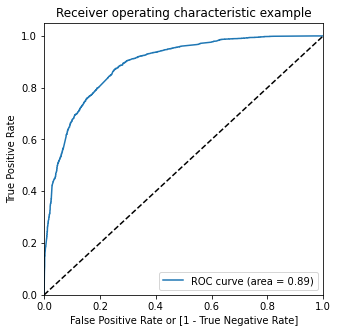

In [1130]:
# drawing ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

#### Lets find optimal cutoff value 

In [1131]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.072003,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.107098,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.641983,1,1,1,1,1,1,1,1,0,0,0
4750,1,0.672459,1,1,1,1,1,1,1,1,0,0,0
7987,1,0.921213,1,1,1,1,1,1,1,1,1,1,1


In [1132]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.604787  0.986100  0.365941
0.2   0.2  0.762715  0.917825  0.665557
0.3   0.3  0.791057  0.876942  0.737260
0.4   0.4  0.810424  0.766149  0.838156
0.5   0.5  0.813573  0.696239  0.887068
0.6   0.6  0.807589  0.636141  0.914981
0.7   0.7  0.782396  0.520850  0.946223
0.8   0.8  0.762557  0.432952  0.969014
0.9   0.9  0.713274  0.276778  0.986684


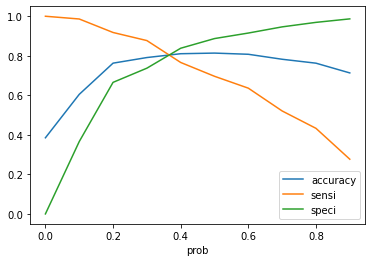

In [1133]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve the optimum probability is ~0.35

In [1134]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.072003,0,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.107098,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.641983,1,1,1,1,1,1,1,1,0,0,0,1
4750,1,0.672459,1,1,1,1,1,1,1,1,0,0,0,1
7987,1,0.921213,1,1,1,1,1,1,1,1,1,1,1,1


In [1135]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8044402456306093

In [1136]:
# confusion matrix 2
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3154,  751],
       [ 491, 1955]], dtype=int64)

In [1137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1138]:
## Sensitivity
TP/float(TP+FN)

0.7992641046606704

In [1139]:
## Specificity
TN/float(TN+FP)

0.8076824583866837

In [1140]:
## False positivity rate
FP/float(FP+TN)

0.19231754161331627

# Positive predicted value
TP/float(TP+FP)

In [1141]:
## NEGATIVE PREDICTED VALUE
TN/float(FN+TN)

0.8652949245541838

#### For a cutoff probability- 0.35
- Accuracy : 80% 
- Senitivity: 79% 
- Specificity: 80% 

# <font color = 'Green'> 9.Predictions on Test data

In [1142]:
scaler = StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.143722,-0.591008,0.716169,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0.391416,1.894051,1.151248,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,-0.351665,-0.743117,-0.153989,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,-0.847051,-0.878732,-1.024147,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,1.134496,-0.578179,2.456484,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1143]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_No,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3271,-0.591008,0,0,0,1,0,0,0,0,0,0,0
1490,1.894051,0,0,0,1,0,0,0,1,1,0,0
7936,-0.743117,0,0,0,1,0,0,0,0,0,0,0
4216,-0.878732,1,0,0,1,0,0,0,0,1,0,0
3830,-0.578179,0,0,0,1,0,0,0,0,0,0,0


In [1144]:
# adding constant
X_test_sm = sm.add_constant(X_test)

#### Making Predictions

In [1145]:
y_test_pred = res.predict(X_test_sm)

In [1146]:
y_test_pred[:10]

3271    0.045412
1490    0.973424
7936    0.038485
4216    0.822255
3830    0.046048
1800    0.647955
6507    0.363133
4821    0.345630
4223    0.940427
4714    0.327546
dtype: float64

In [1147]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1148]:
# Let's see the head
y_pred_1.head()

,0
3271,0.045412
1490,0.973424
7936,0.038485
4216,0.822255
3830,0.046048


In [1149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1150]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1151]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1152]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.045412
1,1,0.973424
2,0,0.038485
3,1,0.822255
4,0,0.046048


### Prediction with 0.35 cutoff

In [1153]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [1154]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.045412,0
1,1,0.973424,1
2,0,0.038485,0
3,1,0.822255,1
4,0,0.046048,0


In [1155]:
### Accuracy score
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8060962174072714

In [1156]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1417,  317],
       [ 211,  778]], dtype=int64)

In [1157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1158]:
## sensitivity
TP / float(TP+FN)

0.7866531850353893

In [1159]:
## Specificity
TN/float(TN+FP)

0.8171856978085352

### For a cutoff probability - 0.35 on Test dataset
- Accuracy : 80% 
- Senitivity: 78% 
- Specificity: 81%

# <font color = 'Green'> 10.Precision & Recall

In [1160]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3464,  441],
       [ 743, 1703]], dtype=int64)

#### Precision

In [1161]:
# TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7943097014925373

#### Recall

In [1162]:
# TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.696238757154538

In [1163]:
### lets do it from library
from sklearn.metrics import precision_score, recall_score


In [1164]:
## Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7943097014925373

In [1165]:
## Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.696238757154538

### Precision & Recall trade-off

In [1166]:
from sklearn.metrics import precision_recall_curve

In [1167]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64,
 3009    0
 1012    0
 9226    1
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    1
 7077    0
 5754    1
 Name: predicted, Length: 6351, dtype: int64)

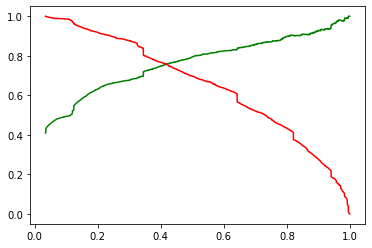

In [1168]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the plot we got Precision 79% & Recall 69% at a cuttoff probability as 0.41


### Predictions at 0.41 cuttoff probability

In [1169]:
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.045412
1,1,0.973424
2,0,0.038485
3,1,0.822255
4,0,0.046048


In [1170]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [1171]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.045412,0
1,1,0.973424,1
2,0,0.038485,0
3,1,0.822255,1
4,0,0.046048,0


In [1172]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8145427836944547

In [1173]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1470,  264],
       [ 241,  748]], dtype=int64)

In [1174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1175]:
## SENSTIVITY
TP / float(TP+FN)

0.756319514661274

In [1176]:
## SPECIFICITY
TN/float(TN+FP)

0.8477508650519031

### For a cuttoff probability 0.41
- Accuracy : 81% 
- Senitivity: 76% 
- Specificity: 85% 

### Feature Importance

In [1177]:
start = "\x1B[1;3m"
end = '\x1B[0m'
print(start+"-----------------------Feature Importance--------------------\n"+end)
print(res.params)

-----------------------Feature Importance--------------------

const                                                                   -4.017024
Total Time Spent on Website                                              1.135651
Lead Origin_Lead Add Form                                                3.589406
Lead Source_Olark Chat                                                   1.425519
Lead Source_Welingak Website                                             1.976462
Do Not Email_No                                                          1.642694
Last Activity_Converted to Lead                                         -1.296919
Last Activity_Olark Chat Conversation                                   -1.355375
Last Activity_SMS Sent                                                   1.227435
What is your current occupation_Working Professional                     2.509596
What matters most to you in choosing a course_Better Career Prospects    1.314554
Last Notable Activity_Had a Phone C

# <font color = 'Orange'> Conclusion

#### 1) From the given data the conversion rate was 39% .
#### 2) When ‘Lead Origin’ is ‘Lead add form’, the probability of lead getting converted is high. 
#### 3) Google and direct traffic generating majority of leads, but referral sites shows high Conversion rate.
#### 4) Most of the leads are opting for mailing them.
#### 5) Conversion rate is higher when the information is sent through sms. 
#### 6) Unemployed people have more conversion rate as well as more count. 
#### 7) Our model gives accuracy of 81% with our selected cutoff of 0.5. 
#### 8) An optimal cutoff comes out to be 0.35 which gives the accuracy of 80% with sensitivity and specificity at 79% and 80%.          
#### 9) Lead Origin_Lead Add Form, Last Notable Activity_Had a Phone Conversation, What is your current occupation, 
####    Working Professional are the features shows high promising leads. 
#### 10) Last Activity_Converted to Lead, Last Activity_Olark Chat Conversation shows less lead conversion rate.